In [1]:
import easyocr
import spacy
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import re


In [2]:
ocr = easyocr.Reader(['en'])
nlp = spacy.load("en_core_web_sm")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

c:\projects\personal information detect\personal\Lib\site-packages\spacy\util.py:922: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.7). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [15]:
image_path = "receipt1.jpg"  # Make sure this file exists in the same folder
image = cv2.imread(image_path)
ocr_results = ocr.readtext(image_path)


c:\projects\personal information detect\personal\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [16]:
text_combined = " ".join([text for _, text, _ in ocr_results])
doc = nlp(text_combined)

# View detected entities
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")


234 → CARDINAL
Lorca → PERSON
4icl → CARDINAL
11.90 → CARDINAL
Elie 0.40 → PERSON
84.80 → CARDINAL
Sub-Lotal → ORG
84.80 → CARDINAL


In [17]:
# Add common regex patterns
regex_patterns = {
    "AADHAAR": r"\b\d{4}\s\d{4}\s\d{4}\b",
    "PAN": r"\b[A-Z]{5}[0-9]{4}[A-Z]\b",
    "PHONE": r"\+91[-\s]?\d{10}|\b\d{10}\b",
    "EMAIL": r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b"
}

# Match regex entities
matches = []
for label, pattern in regex_patterns.items():
    for match in re.findall(pattern, text_combined):
        matches.append((match, label))
        print(f"{match} → {label}")


c:\projects\personal information detect\personal\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


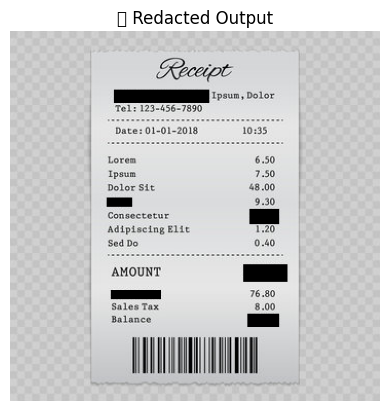

In [18]:
for (bbox, text, prob) in ocr_results:
    for ent in doc.ents:
        if ent.text.lower() in text.lower():
            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))
            cv2.rectangle(image, top_left, bottom_right, (0, 0, 0), -1)

    for match, _ in matches:
        if match.lower() in text.lower():
            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))
            cv2.rectangle(image, top_left, bottom_right, (0, 0, 0), -1)

# Save & show redacted image
cv2.imwrite("redacted_output.jpg", image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("🔐 Redacted Output")
plt.show()
